Sersic Profile fitting

In [66]:
import numpy as np
from astropy.modeling import models, fitting
from astropy.modeling.models import Sersic1D
##
data =np.loadtxt(r'C:\Users\MayHem\Downloads\SBP.txt')
##
rd =  data[:,0]*60
mu =  data[:,1] 
I  =   10**(26.4-mu/2.5)
###########################################Fitting 
I,rd




(array([6.19441075e+17, 6.60693448e+17, 5.01187234e+17, 3.69828180e+17,
        2.72897778e+17, 2.46603934e+17, 2.20800473e+17, 1.73780083e+17,
        1.51356125e+17, 1.34276496e+17, 1.21338885e+17, 1.04712855e+17,
        9.12010839e+16, 7.51622894e+16, 5.49540874e+16, 5.05824662e+16,
        4.87528490e+16, 3.56451133e+16, 2.83139200e+16, 2.05116218e+16,
        1.29419584e+16, 7.65596607e+15, 5.24807460e+15, 3.37287309e+15,
        3.22106879e+15, 2.14783047e+15, 1.58489319e+15, 1.12719746e+15,
        6.42687717e+14, 3.31131121e+14, 2.83139200e+14, 2.39883292e+14,
        2.58226019e+14]),
 array([  2.4,   6.6,  11.4,  15.6,  20.4,  24.6,  29.4,  33.6,  37.8,
         42.6,  46.8,  51.6,  55.8,  60.6,  64.8,  69.6,  73.8,  78. ,
         90. , 102. , 114. , 126. , 138. , 150. , 162. , 174. , 186. ,
        198. , 222. , 234. , 246. , 258. , 318. ]))

In [71]:
sers = Sersic1D(amplitude=1.21e17, r_eff=46.8,n=1)
fit_sers_l02 = fitting.LevMarLSQFitter()
Sers_l02 = fit_sers_l02(sers,rd,I)

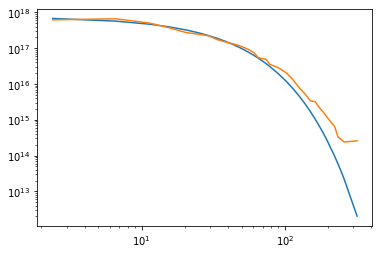

In [72]:
import matplotlib.pyplot as plt
plt.plot(rd,Sers_l02(rd))
plt.plot(rd,I)
#plt.plot(rd,sers(rd))
plt.xscale('log')
plt.yscale('log')

In [75]:
print(Sers_l02)

Model: Sersic1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
          amplitude              r_eff               n         
    ---------------------- ----------------- ------------------
    1.3738318995569696e+17 41.37931598435349 1.0078238806614492


In [76]:
import numpy as np
from scipy.integrate import simps
L= 2 * np.pi * rd * Sers_l02(rd)
L=np.trapz()


In [78]:
from sklearn import metrics
metrics.auc(rd,Sers_l02(rd))

1.6598380754106126e+19

Total Luminosity is 1.6e19 solar luminosity